# Multiprocessing

`multiprocessing` es un paquete de python que permite la generación de  procesos, ofrece concurrencia local como remota.

Una manera sencilla de generar un proceso es por medio de la creación del objeto `Process` que ejecuta la tarea especificada en el valor del argumento `target`. El proceso hijo creado se inicia por medio del método `start()`, mientras que con la función `join()` el proceso principal o padre espera a la finalización del proceso creado.

Iniciemos con un ejemplo de motivación a la creación de procesos: calculemos el cuadrado de un conjunto de números.

In [24]:
import time

def calc_cuad(numeros):
    print("calcula cuadrado de números")
    for n in numeros:
        time.sleep(0.2)
        print('cuadrado:', n * n )

t = time.time()
nums = range(10)
calc_cuad(nums)
print("Tiempo de ejecución: ", time.time()-t)
print("Finaliza ejecución")

calcula cuadrado de números
cuadrado: 0
cuadrado: 1
cuadrado: 4
cuadrado: 9
cuadrado: 16
cuadrado: 25
cuadrado: 36
cuadrado: 49
cuadrado: 64
cuadrado: 81
Tiempo de ejecución:  2.0154128074645996
Finaliza ejecución


Ahora calculemos el cuadrado y el cubo del mismo conjunto de números

In [9]:
import time

def calc_cuad(numeros):
    print("calcula el cuadrado:")
    for n in numeros:
        time.sleep(0.2)
        print('cuadrado:', n * n )
        
def calc_cubo(numeros):
    print("calcula el cubo:")
    for n in numeros:
        time.sleep(0.4)
        print('cubo:', n * n * n)
        
nums = range(10)
t = time.time()
calc_cuad(nums)
calc_cubo(nums)

print("Tiempo de ejecución: ", time.time()-t)
print("Finaliza ejecución")

calcula el cuadrado:
cuadrado: 0
cuadrado: 1
cuadrado: 4
cuadrado: 9
cuadrado: 16
cuadrado: 25
cuadrado: 36
cuadrado: 49
cuadrado: 64
cuadrado: 81
calcula el cubo:
cubo: 0
cubo: 1
cubo: 8
cubo: 27
cubo: 64
cubo: 125
cubo: 216
cubo: 343
cubo: 512
cubo: 729
Tiempo de ejecución:  6.025312662124634
Finaliza ejecución


Un proceso hijo se crea de la siguiente forma:

In [ ]:
import multiprocessing as mp


In [17]:
def tarea(nombre):
    print('Hola', nombre)

if __name__ == '__main__':
    p = mp.Process(target=tarea, args=('oscar',))
    p.start()
    p.join()

Hola oscar


Ahora vamos a crear un proceso hijo que calcule el cuadrado de un conjunto de números:

In [21]:
def calc_cuad(numeros):
    print("calcula cuadrado de números")
    for n in numeros:
        time.sleep(0.2)
        print('cuadrado:', n * n )

nums = range(10)

t = time.time()
p1 = mp.Process(target=calc_cuad, args=(nums,))

p1.start()
p1.join()

print("Tiempo de ejecución: ", time.time()-t)
print("Finaliza ejecución")

calcula cuadrado de números
cuadrado: 0
cuadrado: 1
cuadrado: 4
cuadrado: 9
cuadrado: 16
cuadrado: 25
cuadrado: 36
cuadrado: 49
cuadrado: 64
cuadrado: 81
Tiempo de ejecución:  2.401238441467285
Finaliza ejecución


Dos procesos hijos calculan el cuadrado y el cubo del mismo conjunto de números:

In [18]:
def calc_cuad(numeros):
    print("calcula cuadrado de números")
    for n in numeros:
        time.sleep(0.2)
        print('cuadrado:', n * n )
        
def calc_cubo(numeros):
    print("calcula cubo de números")
    for n in numeros:
        time.sleep(0.4)
        print('cubo:', n * n )


nums = range(10)

t = time.time()
p1 = mp.Process(target=calc_cuad, args=(nums,))
p2 = mp.Process(target=calc_cubo, args=(nums,))

p1.start()
p2.start()

p1.join()
p2.join()


print("Tiempo de ejecución: ", time.time()-t)
print("Finaliza ejecución")

calcula cuadrado de números
calcula cubo de números
cuadrado: 0
cubo: 0
cuadrado: 1
cuadrado: 4
cubo: 1
cuadrado: 9
cuadrado: 16
cubo: 4
cuadrado: 25
cuadrado: 36
cubo: 9
cuadrado: 49
cuadrado: 64
cubo: 16
cuadrado: 81
cubo: 25
cubo: 36
cubo: 49
cubo: 64
cubo: 81
Tiempo de ejecución:  4.379377603530884
Finaliza ejecución


## Identificadores pid, ppid

Los identificadores de proceso padre y del proceso hijo se pueden obtenter con las funciones `getppid()` y `getppid()`

In [25]:
import os

print('module name:', __name__)
print('parent process:', os.getppid())
print('process id:', os.getpid())

module name: __main__
parent process: 163357
process id: 163530


In [17]:
from multiprocessing import Process
import os

def info(titulo):
    print(titulo)
    print('module name:', __name__)
    print('parent process:', os.getppid())
    print('process id:', os.getpid())

def f(nombre):
    info('funcion f')
    print('hello', nombre)
    print("---------")

#f __name__ == '__main__':
info('Primera linea')
p = Process(target=f, args=('oscar',))
p.start()
p.join()

Primera linea
module name: __main__
parent process: 46414
process id: 46561
funcion f
module name: __main__
parent process: 46561
process id: 48245
hello oscar
---------


In [10]:
def childTask():
    print("Child Process With PID: {}".format(multiprocessing.current_process().pid))
    time.sleep(3)
    print("Child process terminating")

def main():
    print("Main process PID: {}".format(multiprocessing.current_process().pid))
    myProcess = multiprocessing.Process(target=childTask)
    myProcess.start()
    myProcess.join()

# Se acostumbra usar la variable __name__
# para hacer la ejecución desde el progragrama
# principal. En los ejemplos con notebooks la omitiremos 
if __name__ == '__main__':
    main()

Main process PID: 165739
Child Process With PID: 165971
Child process terminating


Con el método `cpu_count()` se muestra el número de procesadores del sistema que se está utilizando.

In [7]:
import multiprocessing
multiprocessing.cpu_count()

4

El identificador del proceso actual se accede por medio de `current_process` 

Es posible asignar un nombre a un proceso hijo que ha sido creado, por medio del argumento `name` se asigna el nombre del proceso hijo.

In [11]:
def myProcess():
    print("{} Just performed X".format(multiprocessing.current_process().name))

def main():
    childProcess = multiprocessing.Process(target=myProcess, name='My-Awesome-Process')
    childProcess.start()
    childProcess.join()

main()

My-Awesome-Process Just performed X


## Finalización de procesos

Un proceso que está en ejecución puede ser cancelado o interrumpido por medido de la función `terminate()`

In [17]:
def myProcess():
    current_process = multiprocessing.current_process()
    print("Child Process PID: {}".format(current_process.pid))
    time.sleep(20)
    current_process = multiprocessing.current_process()
    print("Main process PID: {}".format(current_process.pid))

myProcess = multiprocessing.Process(target=myProcess)
myProcess.start()
#myProcess.join()

print("My Process has terminated, terminating main thread")
print("Terminating Child Process")
myProcess.terminate()
print("Child Process Successfully terminated")

My Process has terminated, terminating main thread
Terminating Child Process
Child Process Successfully terminated


El método `terminate()` ofrece una forma rápida de terminar un proceso. Es importante mencionar que los procesos hijos que del proceso que termina no son finalizados al realizar la llamada a `terminate()`, estos procesos se denominarán **procesos huérfanos**.

Aunque finalizar un proceso puede ser mal visto, algunas veces es necesario si existe algún problema al realizar tareas de _comunicación interprocesos_.

Al utlizar `terminate()` es importante hacer la llamada a `join()` también debido a que no es inmediata la actualización del estado `alive` del proceso.

## Procesos como objetos

En el siguiente ejemplo se muestra como crear un proceso por medio de la definición de la clase `MyProcess` que hereda de la clase base `multiprocessing.Process`. La clase creada incluye un **constructor** y el método `run()`.


In [13]:
class MyProcess(multiprocessing.Process):
    def __init__(self):
        super(MyProcess, self).__init__()

    def run(self):
        print("Child Process PID: {}".format(multiprocessing.current_process().pid))

def main():
    print("Main Process PID: {}".format(multiprocessing.current_process().pid))
    myProcess = MyProcess()
    myProcess.start()
    myProcess.join()
        
main()

Main Process PID: 165739
Child Process PID: 166086


### Ejercicio:
1. Vamos a crear 3 procesos los cuales tendrán nombre y código definido como `funP1`, `funP2`, `funP3`. Cada hijo escribirá su numbre, su `pid` y el `pid` del padre, además de hacer un cálculo sobre tres valores a, b y c. 
2. El proceso 1 calcula $a \times b + c$, el proceso 2 calcula $a \times b \times c$ y el proceso 3 calcula $(a \times b)/c$.
3. Crea un mecanismo para terminar alguno de los procesos de manera aleatoria.


## GIL: Global Interpreter Lock

La ejecució *concurrente* la lleva acabo el intérprete de Python (escrito en C `CPython`). El paquete ofrece concurrencia tanto local como remota, por medio del Interpretre de bloqueo global (GIL. Debido a esto, el módulo `multiprocessing` permite al programador aprovechar al máximo múltiples procesadores en una máquina determinada. La ejecución de multiples procesos creados con `multiprocessing` es posible tanto en Unix como en Windows.

Es el mecanismo utilizado por el intérprete CPython para garantizar que solo un subproceso ejecute el código de bytes (*bytecode*) de Python a la vez. Esto simplifica la implementación de CPython al hacer que el modelo de objetos esté implícitamente seguro contra el acceso concurrente.
El GIL funciona como un mecanismo de sincronización en la ejecución de procesos (e hilos) tal que únicamente un proceso (o hilo) puede ejecutarse a la vez, aún en un procesador multi-core.

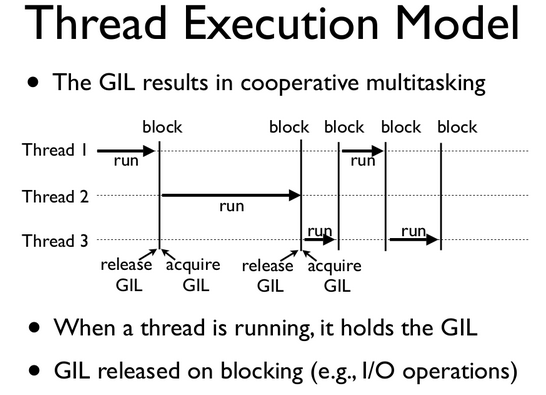

In [4]:
from IPython.display import Image
Image("gil.png", width=450, height=450)

## Esperar la ejecución de procesos

La clase `Process` del módulo `multiprocessing` provee el método `join()` como una forma de esperar que un proceso creado finalice su tarea y salga de su ejecución.

No obstante, a veces se requiere **crear procesos que corran en silencio (_background_) y no bloquear el proceso principal hasta que finalicen**. Esta especificación es comunmente utilizada cuando el proceso principal no tiene la certeza de interrumpir el proceso en un momento específico o cuando al finalizar el proceso principal no se tengan afectaciones por no terminar otro proceso.

Estos proceso se llaman **Proceso demonio** (_daemon processes)_. Por medio del atributo `daemon` del método `Process` se crea un proceso de este tipo. El valor por defecto del atributo `daemon` es `False`, se define a `True` para crear el proceso demonio.

In [14]:
from multiprocessing import Process, current_process
import time

def f1():
    p = current_process()
    print('Starting process %s, ID %s...' % (p.name, p.pid))
    time.sleep(4)
    print('Exiting process %s, ID %s...' % (p.name, p.pid))

def f2():
    p = current_process()
    print('Starting process %s, ID %s...' % (p.name, p.pid))
    time.sleep(2)
    print('Exiting process %s, ID %s...' % (p.name, p.pid))

if __name__ == '__main__':
    p1 = Process(name='Worker 1', target=f1)
    p1.daemon = True
    p2 = Process(name='Worker 2', target=f2)
    
    p1.start()
    time.sleep(1)
    p2.start()

Starting process Worker 1, ID 166162...
Starting process Worker 2, ID 166167...
Exiting process Worker 2, ID 166167...
Exiting process Worker 1, ID 166162...


El proceso `p1` es un proceso demonio y el proceso `p2` es un proceso convencional. La ejecución del primer proceso es más larga que la del segundo, por lo que es muy posible que el proceso `p2` finalice antes del proceso `p1`. Debido a que `p1` es un proceso demonio, el proceso principal deberá finalizar antes que el proceso `p1` termine.

Otra forma de usar los procesos demonios consiste en esperar su ejecución un periodo de tiempo específico antes de terminarlos prematuramente. Las combinación de los procesos demonio con el método `join()` permite determinar un tiempo específico de espera antes de la finalización de un proceso. Por medio del paso de un argumento (número de segundos de espera) al método `join()` de un proceso demonio, se crea una ventana de tiempo de ejecución del proceso después del cual se finalizará haya o no terminado su tarea. 

In [15]:
if __name__ == '__main__':
    p1 = Process(name='Worker 1', target=f1)
    p1.daemon = True
    p2 = Process(name='Worker 2', target=f2)
    
    p1.start()
    time.sleep(1)
    p2.start()
    
    p1.join(1)
    print('Whether Worker 1 is still alive:', p1.is_alive())
    p2.join()


Starting process Worker 1, ID 166201...
Starting process Worker 2, ID 166206...
Whether Worker 1 is still alive: True
Exiting process Worker 2, ID 166206...
Exiting process Worker 1, ID 166201...


Vemos que el proceso `p1` permanece en ejecución y continua vivo el tiempo que se ha indicado en proceso principal.

## Comunicación entre procesos
Consideremos el siguiente ejemplo donde el proceso padre quiere consultar el resultado de una operación que ejecutó el proceso hijo: 

In [22]:
import multiprocessing as mp
import time
import os

In [23]:
nums_res = []

def calc_cuad(numeros):
    global nums_res
    for n in numeros:
        print('cuadrado:', n * n )
        nums_res.append(n * n)  

    
nums = range(10)

t = time.time()
p1 = mp.Process(target=calc_cuad, args=(nums,))

p1.start()
p1.join()

print("Tiempo de ejecución: ", time.time()-t)
print("Resultado del proceso:", nums_res)    
print("Finaliza ejecución")

cuadrado: 0
cuadrado: 1
cuadrado: 4
cuadrado: 9
cuadrado: 16
cuadrado: 25
cuadrado: 36
cuadrado: 49
cuadrado: 64
cuadrado: 81
Tiempo de ejecución:  0.13917756080627441
Resultado del proceso: []
Finaliza ejecución


Los procesos tienen su propio espacio de memoria. Así, las variables del pograma no se comparten entre procesos. Es necesario crear comunicación entre procesos (IPC) si se desea compartir datos entre procesos.

El módulo `multiprocessing` permite compartir datos entre procesos y tener comunicación interprocesos por medio de tuberías y colas. Específicamente provee opciones de paso de mensajes por medio de recursos compartidos: pipes para conexiones punto a punto y colas para multiples productores y consumidores. 

### Memoria compartida

Cuando se realiza una programación concurrente, generalmente es mejor evitar el uso del recursos compartidos en la medida de lo posible. Esto es particularmente cierto cuando se utilizan múltiples procesos.
Sin embargo, si se necesita utilizar algunos datos compartidos, el multiprocesamiento proporciona un medio para hacerlo.

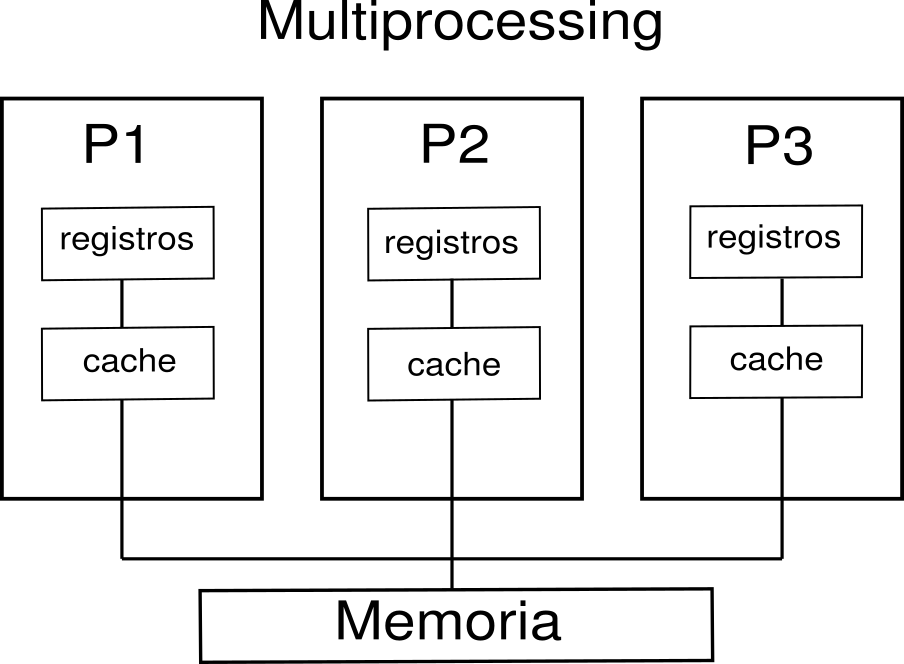

In [28]:
from IPython.display import Image
Image("mem-multiprocessing.png", width=360, height=420)

Los datos se pueden almacenar en un mapa de memoria compartida usando `Value` o `Array`.

Es posible compatir valores unitarios del proceso hijo al proceso padre por medio del método `Value` de multiprocessing.

In [46]:
def escribe_num(val):
    num = val.value * val.value
    print("El cuadrado de ", num)
    
t = time.time()
valor = mp.Value('d', 5.0)
p1 = mp.Process(target=escribe_num, args=(valor,))

p1.start()
p1.join()

print("Resultado fuera del proceso:", valor.value)

El cuadrado de  25.0
Resultado fuera del proceso: 5.0


In [49]:
import multiprocessing as mp
import time

def calc_cuad(numeros, result):
    for idx, n in enumerate(numeros):
        result[idx] = n * n # es un arreglo de C y debo manejarlo a través de sus índices
        
    print("Resultado del proceso:", result[:])    

nums = range(10)

t = time.time()
result = mp.Array('i', 10)
p1 = mp.Process(target=calc_cuad, args=(nums,result))

p1.start()
p1.join()

print("Resultado fuera del proceso:", result[:]) # ¿vamos a poder ver el contenido de result?

print("Tiempo de ejecución: ", time.time()-t)
print("Finaliza ejecución")

Resultado del proceso: [0, 1, 4, 9, 16, 25, 36, 49, 64, 81]
Resultado fuera del proceso: [0, 1, 4, 9, 16, 25, 36, 49, 64, 81]
Tiempo de ejecución:  0.028410911560058594
Finaliza ejecución


### Pipes
Los *pipes* o tuberías representan una forma de pasar información. Los tipos de *pipes* pueden ser anónimos o con nombre.
Los *pipes* anónimos son métodos de comunicación simple del tipo FIFO, son utilizados para la **comunicación interproceso** y solo transmiten en una sola dirección a la vez; para una comunicación bidireccional (duplex) se requieren dos *pipes* anónimos. Los *pipes* con  nombre son idénticos a los anónimos con la diferencia que durarán siempre y cuando el sistema operativo tenga activos *pipes* anónimos. 

In [50]:
from multiprocessing import Process, Pipe
 
def f(conn):
    conn.send(['hello world'])
    conn.close()
    
if __name__ == '__main__':
    parent_conn, child_conn = Pipe()
    p = Process(target=f, args=(child_conn,))
    p.start()
    #print(parent_conn.recv())   
    p.join()
    
    print(parent_conn.recv())  

['hello world']


`Pipe()` devuelve dos objetos de conexión que representan los dos extremos de la tubería. Cada objeto de conexión tiene métodos send() y recv(). Aquí creamos un proceso que imprime el "Hola mundo" de cadena y entonces comparte los datos.

**Ejercicio:** Extiende el código para que dos procesos escriban al padre cada uno una cadena de caracteres.

In [52]:
from multiprocessing import Process, Pipe

def worker(conn):
    print(conn.recv())
    time.sleep(1.8)
    conn.send("sent from child process")
    conn.close()

conn1, conn2 = multiprocessing.Pipe()
process = multiprocessing.Process(target=worker, args=(conn2,))
process.start()

conn1.send("sent from main process")
print(conn1.recv())
process.join()

sent from main process
sent from child process


**Ejercicio:** Extiende el código para que dos procesos reciban un mensaje del padre y cada hijo devuelva un mensaje al padre.

In [53]:
from multiprocessing import Process, Pipe

nombres = ["Carlos", "Renata", "Rebeca", "Sandra", "END"]

def send_msgs(conn, msgs):
    for msg in msgs:
        conn.send(msg)
    conn.close()
    
def recv_msgs(conn):
    
    while 1:
        msg = conn.recv()
        if msg == "END":
            break
        print(msg)
        
parent_conn, child_conn = multiprocessing.Pipe()

p1 = multiprocessing.Process(target=send_msgs, args=(parent_conn, nombres))
p2 = multiprocessing.Process(target=recv_msgs, args=(child_conn,))

p1.start()
p2.start()

p1.join()
p2.join()


Carlos
Renata
Rebeca
Sandra


In [54]:
import os, sys
import multiprocessing

class ChildProcess(multiprocessing.Process):
    
    def __init__(self, pipein):
        super(ChildProcess, self).__init__()
        self.pipein = pipein
        
    def run(self):
        print("Intentando iniciar el pipe")
        self.pipein = os.fdopen(self.pipein, 'w')
        self.pipein.write("Mi código es MX-317")
        self.pipein.close()
        

def main():
    pipeout, pipein = os.pipe()
    
    child = ChildProcess(pipein)
    child.start()
    child.join()
    
    os.close(pipein)
    pipeout = os.fdopen(pipeout)
    
    pipeContent = pipeout.read()
    print("Pipe: {}".format(pipeContent))
    
if __name__== '__main__':
    main()


Intentando iniciar el pipe
Pipe: Mi código es MX-317


> If duplex is True (the default) then the pipe is bidirectional. If duplex is False then the pipe is unidirectional: conn1 can only be used for receiving messages and conn2 can only be used for sending messages.

### Colas
La clase `Queue` del módulo de `multiprocessing` facilita la implementación de una cola FIFO para procesos como para subprocesos. Cualquier objetos de Python se puede pasar a través de un objeto queue. Con las colas es posible pasar mensajes de un lado a otro entre procesos.
Es común usar una cola de mensajes para la comunicación entre procesos en lugar de tener recursos compartidos, ya que, si ciertos procesos manejan mal la memoria y los recursos compartidos, corrompiendo algno de estos mientras se comparten los recursos, habrá numerosas consecuencias indeseables e impredecibles. Sin embargo, si un proceso no pudo manejar su mensaje correctamente, otros elementos en la cola permanecerán intactos.

El siguiente diagrama representa las diferencias en la arquitectura entre el uso de una cola de mensajes y los recursos compartidos (específicamente la memoria) para el interproceso.

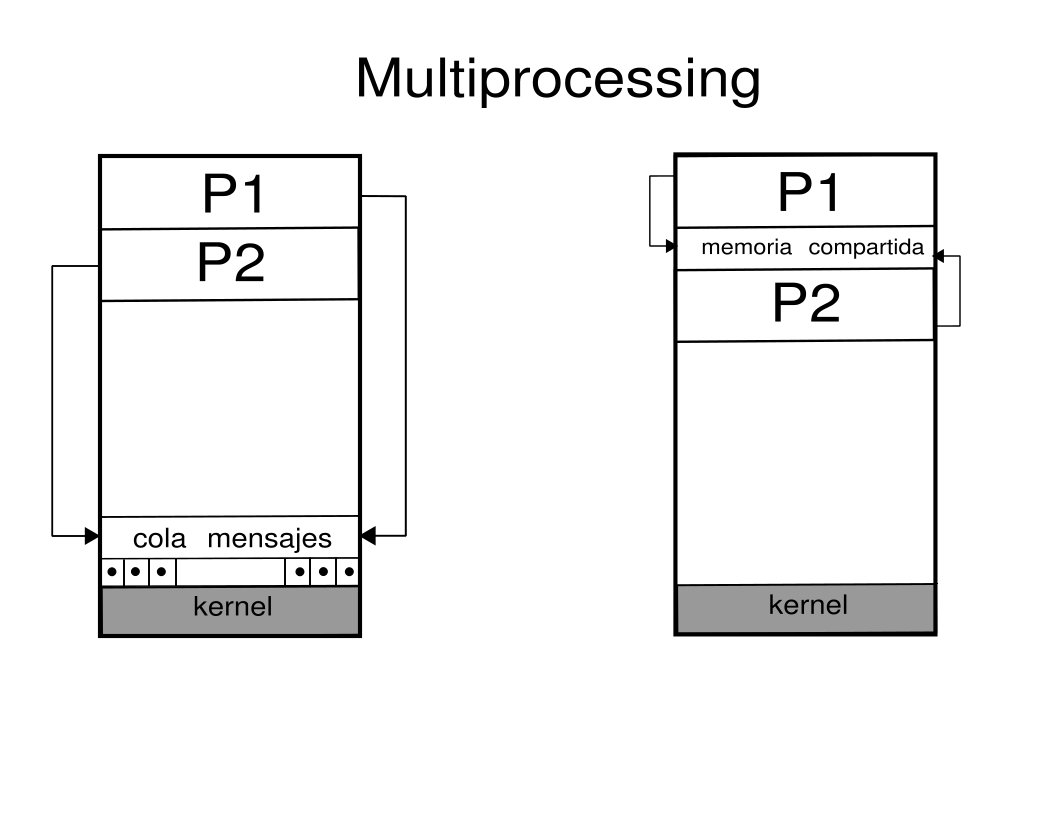

In [55]:
from IPython.display import Image
Image("queue-multiprocessing.png", width=380, height=420)

Veamos un ejemplo sencillo de la creación de una cola por medio de `Queue`:

In [57]:
from multiprocessing import Process, Queue

def f(q):
    q.put([42, None, 'hello'])

if __name__ == '__main__':
    q = Queue()
    p = Process(target=f, args=(q,))
    p.start()
    print(q.get())    # prints "[42, None, 'hello']"
    p.join()

[42, None, 'hello']


In [58]:
import multiprocessing

def calc_cuad(numeros, q):
    for n in numeros:
        q.put(n * n)

if __name__ == '__main__':

    nums = range(10)
    q = multiprocessing.Queue()
    p = multiprocessing.Process(target=calc_cuad, args=(nums,q))
    
    p.start()
    p.join()
    
    while q.empty() is False:
        print(q.get())

0
1
4
9
16
25
36
49
64
81


In [59]:
import multiprocessing

class MyWorker():
    def __init__(self, x):
        self.x = x

    def process(self):
        pname = multiprocessing.current_process().name
        print('Starting process %s for number %i...' % (pname, self.x))

        
def work(q):
    worker = q.get()
    worker.process()

if __name__ == '__main__':
    my_queue = multiprocessing.Queue()

    p = multiprocessing.Process(target=work, args=(my_queue,))
    p.start()

    my_queue.put(MyWorker(1))

    my_queue.close()
    my_queue.join_thread()   ## investigar ...
    p.join()

    print('Done.')

Starting process Process-42 for number 1...
Done.


## Bloqueo

Existen recursos los cuales no se deben acceder al mismo tiempo por dos procesos o más; por lo que es necesario proteger o bloquear el acceso a estos recursos compartidos: memoria, archivos, bases de datos.

In [65]:
import time
import multiprocessing



def deposit(balance):
    for i in range(100):
        time.sleep(0.01)
        balance.value = balance.value + 1
        
def withdraw(balance):
    for i in range(100):
        time.sleep(0.01)
        balance.value = balance.value - 1
    
        
if __name__ == '__main__':
    balance = multiprocessing.Value('i', 200)
    d = multiprocessing.Process(target=deposit, args=(balance,))
    w = multiprocessing.Process(target=withdraw, args=(balance,))
    d.start()
    w.start()
    d.join()
    w.join()
    print(balance.value)

200


In [61]:
import time
import multiprocessing

def deposit(balance, lock):
    for i in range(100):
        time.sleep(0.01)
        lock.acquire()
        balance.value = balance.value + 1
        lock.release()
        
def withdraw(balance, lock):
    for i in range(100):
        time.sleep(0.01)
        lock.acquire()
        balance.value = balance.value - 1
        lock.release()
    
        
if __name__ == '__main__':
    balance = multiprocessing.Value('i', 200)
    lock = multiprocessing.Lock()
    d = multiprocessing.Process(target=deposit, args=(balance, lock))
    w = multiprocessing.Process(target=withdraw, args=(balance, lock))
    d.start()
    w.start()
    d.join()
    w.join()
    print(balance.value)

200


## Distribución de trabajo 

Por medio del método `Pool()` se distribuyen un conjunto de datos entre múltiples procesadores. A través de esta técnica se puede implementar el modelo de programación paralelelo `mapreduce` 

In [67]:
from multiprocessing import Pool

def cuad (n):
    return n * n

if __name__ == "__main__":
    
    datos = [1, 2, 3, 4, 5]
    p = Pool()
    resultado = p.map(cuad, datos)
    print(resultado)

[1, 4, 9, 16, 25]


In [68]:
from multiprocessing import Pool
import time

def suma(n):
    val = 0
    for x in range(1000):
        val += x*x
        
    return val

t = time.time()
result = []
for x in range(100000):
    resultado.append(suma(x))
    
print("Processo serial: ", time.time()-t)

Processo serial:  10.855599641799927


In [70]:
from multiprocessing import Pool
import time

def suma(n):
    val = 0
    for x in range(1000):
        val += x*x    
    return val

if __name__ == "__main__":
    
    t = time.time()
    p = Pool()
    resultado = p.map(suma,range(100000))
    p.close()
    p.join()
    
    print("Processo concurrente: ", time.time()-t)

Processo concurrente:  5.940945148468018
